# Group Assignment 1

In [63]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS

## Scraper Development

In [2]:
def scrape_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        messages = soup.find_all("div", class_ = "Message userContent")

        dates = soup.find_all("time")

        data = []

        for message, date in zip(messages, dates):
            message_text = message.get_text(strip = True)
            date_text = date.get("title")
            data.append({"Date": date_text, "Message": message_text})

        return data


def scrape_forum(base_url, total_pages):
    all_data = []

    for page_num in range(1, total_pages + 1):
        page_url = f"{base_url}/p{page_num}"
        print(f"Scraping page {page_num}: {page_url}")
        page_data = scrape_page(page_url)
        all_data.extend(page_data)
    return all_data

In [15]:
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
total_pages = 300
forum_data = scrape_forum(base_url, total_pages)
messagedata = pd.DataFrame(forum_data)
messagedata.to_csv("messagedata.csv", index = False)
len(messagedata)

Scraping page 1: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1
Scraping page 2: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
Scraping page 3: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
Scraping page 4: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
Scraping page 5: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
Scraping page 6: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
Scraping page 7: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
Scraping page 8: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
Scraping page 9: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
S

15001

## Task A

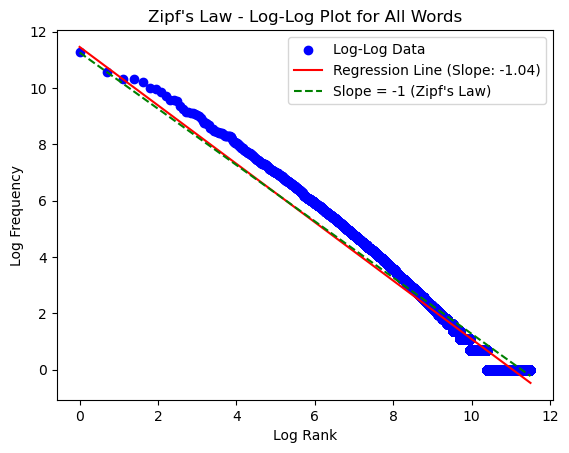

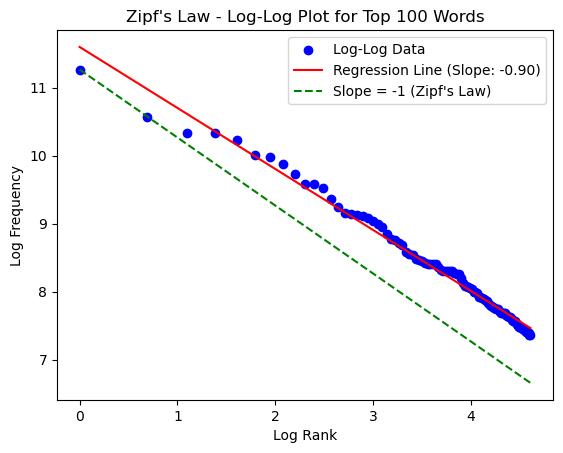

In [3]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

## Task B

In [21]:
# ChatGPT Support
# Set up ChromeDriver path
driver_path = "/Users/ramzikattan/Downloads/chromedriver-mac-arm64/chromedriver"
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# Configure Chrome options
chrome_options = Options()
chrome_options.binary_location = chrome_path

# Set up the Chrome WebDriver service
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the webpage
carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
driver.get(carurl)
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser after fetching the page
driver.quit()

# Find all table rows
rows = soup.find_all("tr")
print(f"Number of rows fetched: {len(rows)}")

make_model_data = []

# Loop through each row and extract make, model, and years
for row in rows:
    tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
    # Check if the expected number of <td> elements exist
    if len(tds) >= 3:
        try:
            # Extract model from the second <td>
            model_td = tds[0]
            model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Extract make from the third <td>
            make_td = tds[1]
            make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Append the extracted data
            make_model_data.append({
                "make": make,
                "model": model,
            })
        except Exception as e:
            print(f"Error parsing row: {e}")

makemodeldf = pd.DataFrame(make_model_data)
makemodeldf.to_csv("make_model_data.csv")

Number of rows fetched: 1417


In [107]:
# Merging the two dataframes to account for most car brands
makemodeldf['make'] = makemodeldf['make'].str.lower()
makemodeldf['model'] = makemodeldf['model'].str.lower()
print(len(makemodeldf))

makemodeldf2 = pd.read_csv("Replacement_words.csv")
makemodeldf2.rename(columns={'Brand': 'make'}, inplace=True)
makemodeldf2.rename(columns={'Model': 'model'}, inplace=True)
makemodeldf2['make'] = makemodeldf2['make'].str.lower()
makemodeldf2['model'] = makemodeldf2['model'].str.lower()
print(len(makemodeldf2))

# Save to CSV
mergedmakemodel = pd.concat([makemodeldf, makemodeldf2], ignore_index=True)
mergedmakemodel = mergedmakemodel.drop_duplicates()
mergedmakemodel.to_csv("merged.csv")
print(len(mergedmakemodel))

1416
539
1730


In [109]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]
    return set([word for word in replaced_words if word not in stop_words and word in brands_set])

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")

Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5111
Acura: 3232
Polestar: 2365
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835


## Task C

In [94]:
top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=5):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:
            co_occurrences.add((brand1, brand2))
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)
for message in messagedf['Message']:

    replaced_message = replacements(message, model_to_brand, brands_set)
    replaced_message_str = ' '.join(replaced_message)
    
    brands_in_message = set(replaced_message).intersection(top_10_brands)
    
    brand_counter.update(brands_in_message)
    
    co_occurrences = find_co_occurrences(replaced_message_str, top_10_brands, distance=5)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    P_AB = co_occurrence_counter[(brand1, brand2)] / total_messages 
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)
print(lift_df)

lift_df.to_csv('brand_lift_ratios.csv', index=False)

      Brand1    Brand2      Lift
40     honda    toyota  2.741164
37      audi    toyota  1.504129
33  polestar    toyota  1.446185
28     acura    toyota  1.387778
9      lexus       bmw  1.247193
42  cadillac    toyota  1.012198
7   infiniti    toyota  0.893112
30  polestar      audi  0.854619
1   infiniti       bmw  0.707375
0   infiniti     lexus  0.645829
10     lexus     acura  0.337294
15     lexus    toyota  0.194839
14     lexus  cadillac  0.163588
17       bmw     acura  0.143097
13     lexus     honda  0.142836
22       bmw    toyota  0.119555
32  polestar  cadillac  0.115413
36      audi  cadillac  0.091636
38      audi    nissan  0.088459
31  polestar     honda  0.082522
34  polestar    nissan  0.068367
35      audi     honda  0.063535
2   infiniti     acura  0.019043
11     lexus  polestar  0.017702
18       bmw  polestar  0.011973
19       bmw      audi  0.011267
12     lexus      audi  0.009370
20       bmw     honda  0.009303
16     lexus    nissan  0.005785
29     acu

## Task D

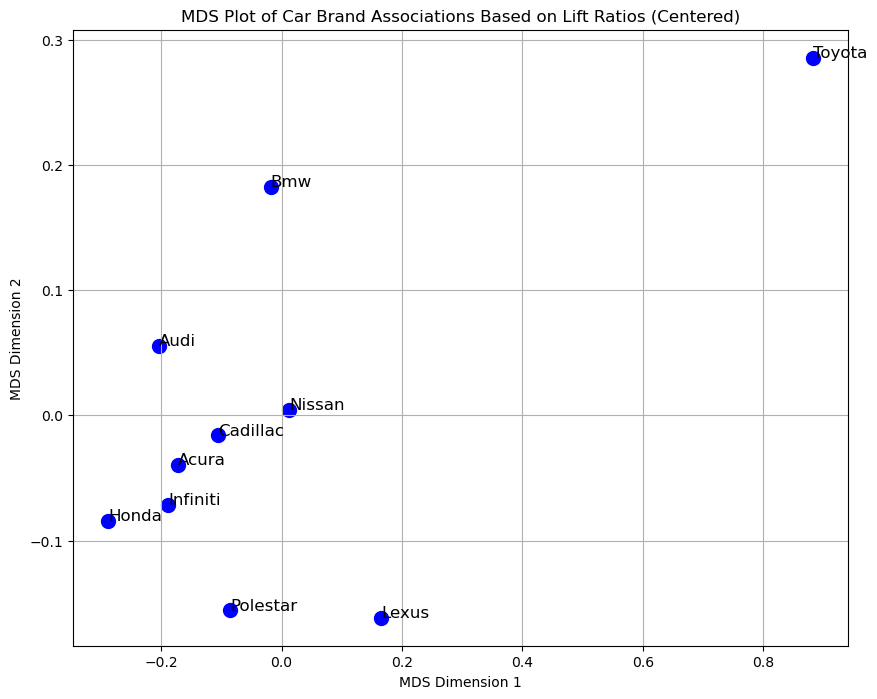

In [95]:
dissimilarity_matrix = np.ones((10, 10))

for _, row in lift_df.iterrows():
    brand1_idx = brands.index(row['Brand1'])
    brand2_idx = brands.index(row['Brand2'])
    lift_value = row['Lift']
    dissimilarity_matrix[brand1_idx, brand2_idx] = lift_value
    dissimilarity_matrix[brand2_idx, brand1_idx] = lift_value  # Ensure the matrix is symmetric


mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dissimilarity_matrix)

# Center the MDS coordinates by subtracting the mean of each axis
mds_coords_centered = mds_coords - mds_coords.mean(axis=0)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(mds_coords_centered[:, 0], mds_coords_centered[:, 1], color='blue', s=100)

for i, brand in enumerate(brands):
    plt.annotate(brand.capitalize(), (mds_coords_centered[i, 0], mds_coords_centered[i, 1]), fontsize=12)

plt.title('MDS Plot of Car Brand Associations Based on Lift Ratios (Centered)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()